In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas.tseries.offsets import MonthBegin, MonthEnd
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [19]:
if not os.path.exists("../share"):
    os.mkdir("../share")
if not os.path.exists("../share/sorted_portfolio_vw"):
    os.mkdir("../share/sorted_portfolio_vw")
if not os.path.exists("../share/sorted_portfolio_ew"):
    os.mkdir("../share/sorted_portfolio_ew")
if not os.path.exists("../tmp"):
    os.mkdir("../tmp")

# returns

In [22]:
df = pd.read_csv("../return/TRD_Mnth.csv")
#,encoding='utf8',error_bad_lines=False, engine ='python')
df = df[['Stkcd','Trdmnt','Mretwd']]
df.columns = ['asset','date','ret']
df['date'] = pd.to_datetime(df['date'])  # date formated
df['date'] = df['date']+MonthEnd(0)      # date is formatted as month end
df = df[ (df['date']>='2000') & (df['date']<='2020')]
df.shape

(499301, 3)

In [23]:
df_pivot = pd.pivot(data=df,values='ret', index='date', columns='asset')
df_pivot = df_pivot.reset_index()
df_pivot.head()

asset,date,1,2,3,4,5,6,7,8,9,...,900947,900948,900949,900950,900951,900952,900953,900955,900956,900957
0,2000-01-31,0.061891,0.161126,0.053016,0.573443,0.365894,0.161734,0.155000,1.126714,0.161017,...,0.072993,-0.034483,0.016667,0.088235,0.017241,0.122642,-0.011765,0.166667,0.052632,NaN
1,2000-02-29,-0.011333,0.405687,0.145833,0.011949,0.040000,0.049136,0.159091,-0.061138,0.065693,...,-0.129252,-0.142857,-0.147541,-0.067568,-0.271186,-0.092437,-0.119048,0.040816,-0.070000,NaN
2,2000-03-31,0.002729,-0.144302,0.180303,0.183764,0.046620,-0.028621,0.218487,-0.142908,0.296804,...,0.093750,0.208333,0.076923,0.072464,0.255814,0.009259,0.094595,-0.141176,0.032258,NaN
3,2000-04-30,0.037017,-0.016548,-0.124519,-0.043017,0.016704,0.071429,-0.134866,-0.012985,0.049296,...,0.021429,0.034483,0.133929,0.081081,0.000000,0.073394,0.024691,0.004566,-0.020833,NaN
4,2000-05-31,-0.055118,-0.047276,-0.099707,0.366124,0.095290,-0.010833,-0.025686,-0.075017,0.134228,...,0.258741,0.316667,0.251969,0.325000,0.388889,0.282051,0.301205,0.268182,0.234043,NaN


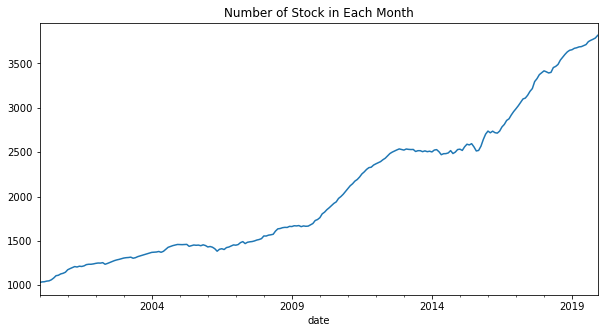

In [24]:
plt.figure(figsize=(10,5))
df.groupby('date').count()['ret'].plot()
plt.title('Number of Stock in Each Month')
plt.show()
plt.close()

# cross-sectional 

- asset characteristics

In [25]:
char_list = ['adm','beta','bm',
             'ch4mkt_beta','ch4pmo_beta','ch4smb_beta','ch4vmg_beta',
             'dbeta','de','ep','idvc','m1','m11',
             'rdm','rs','season','size','sp','sue','tv'
            ]
print(len(char_list))

20


In [26]:
for char in tqdm(char_list):
    da = pd.read_csv("../chars/"+char+".csv")
    #,encoding='utf8',error_bad_lines=False, engine ='python')
    da['Trdmnt'] = pd.to_datetime(da['Trdmnt'],format='%Y%m')
    da['Trdmnt'] = da['Trdmnt'] + MonthEnd(0)
    da['Trdmnt'] = da['Trdmnt'] + MonthEnd(1)
    da = da[ (da['Trdmnt']>='2000') & (da['Trdmnt']<='2020')]
    df_melt = da.melt(id_vars=['Trdmnt'],value_name =char)
    df_melt.columns = ['date','asset',char]
    outputpath="../tmp/"+char+".csv"
    df_melt.to_csv(outputpath,sep=',',index=False,header=True)

100%|██████████| 20/20 [02:05<00:00,  6.27s/it]


In [27]:
da = df.copy()
for char in tqdm(char_list):
    s1 = pd.read_csv("../tmp/"+char+".csv")
    #,encoding='utf8',error_bad_lines=False, engine ='python')
    s1['date'] = pd.to_datetime(s1['date'])
    da = pd.merge(da,s1,how='left',on=['date','asset'])

100%|██████████| 20/20 [01:15<00:00,  3.78s/it]


In [28]:
da.shape

(499301, 23)

# time-series variables

- factors
- macro predictors

In [29]:
f= pd.read_csv("../factors/ch4/CH_4_fac_update_20211231.csv",skiprows=9)
#,encoding='utf8',error_bad_lines=False, engine ='python')
f.rename(columns={'mnthdt':'date'}, inplace = True)
f['date'] = pd.to_datetime([str(i) for i in f['date']])
for i in f.columns[1:]:
    print(i)
    f[i]=f[i]/100
f

rf_mon
mktrf
VMG
SMB
PMO


,date,rf_mon,mktrf,VMG,SMB,PMO
0,2000-01-31,0.0019,0.1479,-0.0084,-0.0188,-0.1090
1,2000-02-29,0.0018,0.1197,-0.0728,0.0165,-0.0127
2,2000-03-31,0.0019,0.0432,-0.0050,0.0785,0.0793
3,2000-04-30,0.0018,0.0168,0.0243,-0.0056,0.0278
4,2000-05-31,0.0019,0.0220,0.0206,0.0185,-0.0093
...,...,...,...,...,...,...
259,2021-08-31,0.0013,0.0285,0.0680,0.0392,-0.0044
260,2021-09-30,0.0013,-0.0036,0.0494,-0.0170,0.0503
261,2021-10-31,0.0013,-0.0027,-0.0433,-0.0257,0.0630
262,2021-11-30,0.0013,0.0196,-0.0380,0.1149,0.0485


In [30]:
da = pd.merge(da,f,how='left',on=['date'])
da['xret']=da['ret']-da['rf_mon']
da

,asset,date,ret,adm,beta,bm,ch4mkt_beta,ch4pmo_beta,ch4smb_beta,ch4vmg_beta,...,size,sp,sue,tv,rf_mon,mktrf,VMG,SMB,PMO,xret
0,1,2000-01-31,0.061891,NaN,1.368781,0.209638,NaN,NaN,NaN,NaN,...,16.743352,0.014261,-0.615683,0.025325,0.0019,0.1479,-0.0084,-0.0188,-0.1090,0.059991
1,1,2000-02-29,-0.011333,NaN,1.158369,0.197419,NaN,NaN,NaN,NaN,...,16.803403,0.013430,-0.615683,0.021039,0.0018,0.1197,-0.0728,0.0165,-0.0127,-0.013133
2,1,2000-03-31,0.002729,NaN,0.946484,0.199682,NaN,NaN,NaN,NaN,...,16.792006,0.013584,-0.615683,0.022118,0.0019,0.0432,-0.0050,0.0785,0.0793,0.000829
3,1,2000-04-30,0.037017,NaN,0.871047,0.199139,1.038123,0.657728,-0.810119,0.540704,...,16.794731,0.013547,-0.615683,0.023400,0.0018,0.0168,0.0243,-0.0056,0.0278,0.035217
4,1,2000-05-31,-0.055118,NaN,0.815708,0.142193,0.976535,0.482908,-0.763296,0.748815,...,16.831079,0.013063,-0.615683,0.022473,0.0019,0.0220,0.0206,0.0185,-0.0093,-0.057018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499296,900957,2019-08-31,-0.111854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0013,-0.0077,-0.0363,-0.0074,-0.0334,-0.113154
499297,900957,2019-09-30,0.097745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0012,0.0061,0.0113,0.0053,0.0049,0.096545
499298,900957,2019-10-31,-0.017121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0013,0.0111,0.0135,-0.0212,0.0069,-0.018421
499299,900957,2019-11-30,-0.076655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0012,-0.0180,0.0183,-0.0106,-0.0030,-0.077855


In [31]:
da['lag_me'] = np.exp(da['size'])
da['log_me'] = da['size']
da['me'] = da['size']
del da['size']

# output the raw data

In [32]:
da.columns

Index(['asset', 'date', 'ret', 'adm', 'beta', 'bm', 'ch4mkt_beta',
       'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 'dbeta', 'de', 'ep',
       'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'sp', 'sue', 'tv', 'rf_mon',
       'mktrf', 'VMG', 'SMB', 'PMO', 'xret', 'lag_me', 'log_me', 'me'],
      dtype='object')

In [33]:
da=da[[
    # id
    'asset', 'date', 'ret', 'xret', 'lag_me', 'log_me',
    # cs
    'me',
    'adm', 'beta', 'bm', 
    'ch4mkt_beta','ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 
    'dbeta', 'de', 'ep','idvc', 
    'm1', 'm11', 'rdm', 'rs', 
    'season',  'sp', 'sue', 'tv',
    # ts
    'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'
]
]

In [34]:
da.isna().sum()

asset               0
date                0
ret              2955
xret             2955
lag_me          52579
log_me          52579
me              52579
adm             69481
beta            57015
bm              59888
ch4mkt_beta     59616
ch4pmo_beta     59616
ch4smb_beta     59616
ch4vmg_beta     59616
dbeta           95422
de              74376
ep              64645
idvc            57015
m1              55506
m11            128097
rdm             66904
rs             123783
season         145340
sp              68998
sue            123730
tv              57015
rf_mon              0
mktrf               0
VMG                 0
SMB                 0
PMO                 0
dtype: int64

In [35]:
da=da[~da['xret'].isna()]
da=da[~da['me'].isna()]

In [36]:
da.isna().sum()

asset               0
date                0
ret                 0
xret                0
lag_me              0
log_me              0
me                  0
adm             16902
beta             9667
bm               7309
ch4mkt_beta     12264
ch4pmo_beta     12264
ch4smb_beta     12264
ch4vmg_beta     12264
dbeta           46885
de              21797
ep              12066
idvc             9667
m1               2927
m11             76995
rdm             14325
rs              71204
season         109646
sp              16419
sue             71151
tv               9667
rf_mon              0
mktrf               0
VMG                 0
SMB                 0
PMO                 0
dtype: int64

In [37]:
da.to_csv("../share/panel_raw.csv")

In [38]:
da.columns

Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'me', 'adm', 'beta',
       'bm', 'ch4mkt_beta', 'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta',
       'dbeta', 'de', 'ep', 'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'sp',
       'sue', 'tv', 'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'],
      dtype='object')

In [39]:
da[['ret','m1']]

,ret,m1
0,0.061891,-0.113763
1,-0.011333,0.061891
2,0.002729,-0.011333
3,0.037017,0.002729
4,-0.055118,0.037017
...,...,...
486776,-0.138320,-0.125114
486777,-0.109366,-0.138320
486778,-0.059023,-0.109366
486779,0.361932,-0.059023


# cross-sectional rank $[-1,1]$

In [40]:
def standardize(df):
    # exclude the the information columns
    col_names = df.columns.values.tolist()
    list_to_remove = ['asset', 'date',
                      'ret', 'xret', 'lag_me', 'log_me', 'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'
                     ]
    
    col_names = list(set(col_names).difference(set(list_to_remove)))
    print(col_names)
    for col_name in tqdm(col_names):
        # print('processing %s' % col_name)
        # count the non-missing number of factors, we only count non-missing values
        unique_count = df.dropna(subset=['%s' % col_name]).groupby(['date'])['%s' % col_name].unique().apply(len)
        unique_count = pd.DataFrame(unique_count).reset_index()
        unique_count.columns = ['date', 'count']
        df = pd.merge(df, unique_count, how='left', on=['date'])
        # ranking, and then standardize the data
        df['%s_rank' % col_name] = df.groupby(['date'])['%s' % col_name].rank(method='dense')
        df['rank_%s' % col_name] = (df['%s_rank' % col_name] - 1) / (df['count'] - 1) * 2 - 1
        df = df.drop(['%s_rank' % col_name, '%s' % col_name, 'count'], axis=1)
    df = df.fillna(0)
    return df

In [41]:
da_rank = standardize(da)
da_rank.columns

  0%|          | 0/20 [00:00<?, ?it/s]

['ch4mkt_beta', 'rdm', 'idvc', 'dbeta', 'tv', 'bm', 'm11', 'sp', 'season', 'adm', 'rs', 'sue', 'ep', 'ch4vmg_beta', 'de', 'beta', 'ch4pmo_beta', 'me', 'm1', 'ch4smb_beta']


100%|██████████| 20/20 [00:07<00:00,  2.60it/s]


Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'rf_mon', 'mktrf',
       'VMG', 'SMB', 'PMO', 'rank_ch4mkt_beta', 'rank_rdm', 'rank_idvc',
       'rank_dbeta', 'rank_tv', 'rank_bm', 'rank_m11', 'rank_sp',
       'rank_season', 'rank_adm', 'rank_rs', 'rank_sue', 'rank_ep',
       'rank_ch4vmg_beta', 'rank_de', 'rank_beta', 'rank_ch4pmo_beta',
       'rank_me', 'rank_m1', 'rank_ch4smb_beta'],
      dtype='object')

In [42]:
da_rank

,asset,date,ret,xret,lag_me,log_me,rf_mon,mktrf,VMG,SMB,...,rank_rs,rank_sue,rank_ep,rank_ch4vmg_beta,rank_de,rank_beta,rank_ch4pmo_beta,rank_me,rank_m1,rank_ch4smb_beta
0,1,2000-01-31,0.061891,0.059991,18687248.21,16.743352,0.0019,0.1479,-0.0084,-0.0188,...,0.500000,-0.289575,-0.560000,0.000000,0.997426,0.908879,0.000000,1.000000,-0.544186,0.000000
1,1,2000-02-29,-0.011333,-0.013133,19843822.88,16.803403,0.0018,0.1197,-0.0728,0.0165,...,0.500000,-0.289575,-0.519253,0.000000,0.997426,0.616185,0.000000,1.000000,-0.283063,0.000000
2,1,2000-03-31,0.002729,0.000829,19618933.36,16.792006,0.0019,0.0432,-0.0050,0.0785,...,0.500000,-0.289575,-0.459207,0.000000,0.997423,0.025287,0.000000,1.000000,-0.789474,0.000000
3,1,2000-04-30,0.037017,0.035217,19672478.48,16.794731,0.0018,0.0168,0.0243,-0.0056,...,0.505703,-0.290076,-0.395833,0.470320,0.994885,-0.292237,0.477169,1.000000,-0.467429,-0.826484
4,1,2000-05-31,-0.055118,-0.057018,20400692.17,16.831079,0.0019,0.0220,0.0206,0.0185,...,0.494163,-0.320312,-0.403509,0.671676,0.997701,-0.463584,0.507514,1.000000,0.318078,-0.817341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446717,688388,2019-09-30,-0.138320,-0.139520,3044574.71,14.928872,0.0012,0.0061,0.0113,0.0053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.140351,-0.930769,0.000000
446718,688388,2019-10-31,-0.109366,-0.110666,2623449.05,14.780000,0.0013,0.0111,0.0135,-0.0212,...,0.000000,0.000000,0.000000,-0.997157,0.000000,-0.990901,0.986921,-0.269546,-0.943486,-0.990901
446719,688388,2019-11-30,-0.059023,-0.060223,2336534.08,14.664179,0.0012,-0.0180,0.0183,-0.0106,...,0.000000,0.000000,0.000000,-0.892857,0.000000,-0.990363,-0.955215,-0.362156,-0.837155,-0.991497
446720,688388,2019-12-31,0.361932,0.360632,2198624.67,14.603343,0.0013,0.0686,0.0021,0.0100,...,0.000000,0.000000,0.000000,-0.885311,0.000000,-0.987006,-0.793220,-0.401281,-0.368143,-0.990395


<AxesSubplot:>

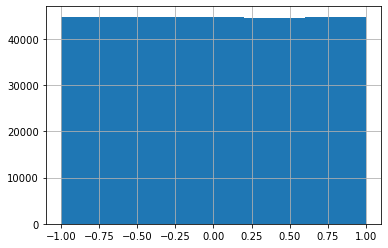

In [43]:
da_rank['rank_me'].hist()

<AxesSubplot:>

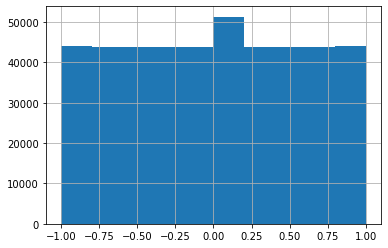

In [44]:
da_rank['rank_bm'].hist()

<AxesSubplot:>

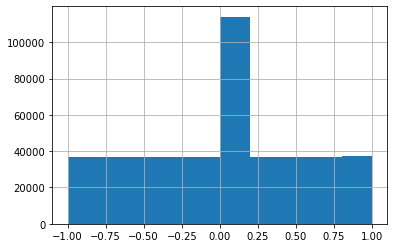

In [45]:
da_rank['rank_m11'].hist()

# output rank data

In [46]:
da_rank.to_csv("../share/panel_rank.csv")

In [47]:
da_rank.columns

Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'rf_mon', 'mktrf',
       'VMG', 'SMB', 'PMO', 'rank_ch4mkt_beta', 'rank_rdm', 'rank_idvc',
       'rank_dbeta', 'rank_tv', 'rank_bm', 'rank_m11', 'rank_sp',
       'rank_season', 'rank_adm', 'rank_rs', 'rank_sue', 'rank_ep',
       'rank_ch4vmg_beta', 'rank_de', 'rank_beta', 'rank_ch4pmo_beta',
       'rank_me', 'rank_m1', 'rank_ch4smb_beta'],
      dtype='object')

# sanity check

ols

In [48]:
da.columns

Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'me', 'adm', 'beta',
       'bm', 'ch4mkt_beta', 'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta',
       'dbeta', 'de', 'ep', 'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'sp',
       'sue', 'tv', 'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'],
      dtype='object')

In [49]:
da[['ret','m1','m11']].corr()

,ret,m1,m11
ret,1.000000,0.012163,0.039107
m1,0.012163,1.000000,0.045166
m11,0.039107,0.045166,1.000000


In [63]:
da['de']=np.where(da['de']>1000,1000,da['de'])

In [64]:
import statsmodels.api as sm
Y = da[['xret']].fillna(0)
X = da[[
        'me',
        'adm', 'beta', 'bm',
       'ch4mkt_beta', 'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 'dbeta',
       'de', 'ep', 'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'sp',
       'sue', 'tv']].fillna(0)
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xret   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     206.3
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:03:43   Log-Likelihood:             2.0940e+05
No. Observations:              446722   AIC:                        -4.188e+05
Df Residuals:                  446701   BIC:                        -4.185e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1323      0.003     44.214      0.000       0.126       0.138
me             -0.0070      0.000    -35.866      0.000      -0.007      -0.007
adm             0.0243      0.008      3.005      0.003       0.008       0.040
beta           -0.0349      0.001    -35.467      0.000      -0.037      -0.033
bm              0.0006      0.000      2.764      0.006       0.000       0.001
ch4mkt_beta     0.0186      0.001     18.971      0.000       0.017       0.020
ch4pmo_beta    -0.0018      0.000     -7.136      0.000      -0.002      -0.001
ch4smb_beta     0.0020      0.000      8.672      0.000       0.002       0.002
ch4vmg_beta    -0.0020      0.000     -9.077      0.000      -0.002      -0.002
dbeta          -0.0033      0.000     -7.185      0.000      -0.004      -0.002
de          -3.108e-05   3.55e-05     -0.876      0.381      -0.000    3.85e-05
ep             -0.0042      0.005     -0.828      0.408      -0.014       0.006
idvc           -0.7652      0.053    -14.443      0.000      -0.869      -0.661
m1              0.0068      0.001      4.888      0.000       0.004       0.010
m11             0.0089      0.000     21.784      0.000       0.008       0.010
rdm            -0.0339      0.010     -3.345      0.001      -0.054      -0.014
rs              0.0001      0.000      0.549      0.583      -0.000       0.000
season          0.0072      0.003      2.136      0.033       0.001       0.014
sp              0.0018      0.000      4.243      0.000       0.001       0.003
sue            -0.0002      0.000     -0.654      0.513      -0.001       0.000
tv              0.6781      0.052     13.150      0.000       0.577       0.779
==============================================================================
Omnibus:                   457115.577   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        212831255.502
Skew:                           4.371   Prob(JB):                         0.00
Kurtosis:                     109.573   Cond. No.                     4.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
da_rank[['ret','rank_m1','rank_m11']].corr()

,ret,rank_m1,rank_m11
ret,1.000000,-0.030879,0.001396
rank_m1,-0.030879,1.000000,-0.028412
rank_m11,0.001396,-0.028412,1.000000


In [66]:
import statsmodels.api as sm
Y = da_rank[['xret']]
X = da_rank[['rank_me',
         'rank_tv', 'rank_bm', 'rank_m11', 
       'rank_ep', 'rank_ch4smb_beta', 'rank_sp', 'rank_beta', 'rank_adm',
       'rank_season', 'rank_sue', 'rank_rs', 'rank_ch4pmo_beta', 'rank_idvc',
       'rank_de', 'rank_dbeta', 'rank_rdm', 'rank_ch4mkt_beta', 'rank_m1',
       'rank_ch4vmg_beta']]
X=sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   xret   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     94.25
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:03:57   Log-Likelihood:             2.0829e+05
No. Observations:              446722   AIC:                        -4.165e+05
Df Residuals:                  446701   BIC:                        -4.163e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0107      0.000     46.912      0.000       0.010       0.011
rank_me             -0.0139      0.000    -28.289      0.000      -0.015      -0.013
rank_tv              0.0016      0.002      0.968      0.333      -0.002       0.005
rank_bm             -0.0026      0.001     -4.765      0.000      -0.004      -0.002
rank_m11             0.0030      0.000      6.115      0.000       0.002       0.004
rank_ep              0.0048      0.001      9.331      0.000       0.004       0.006
rank_ch4smb_beta     0.0017      0.001      3.094      0.002       0.001       0.003
rank_sp             -0.0012      0.001     -1.748      0.081      -0.002       0.000
rank_beta           -0.0059      0.001     -6.127      0.000      -0.008      -0.004
rank_adm             0.0006      0.000      1.172      0.241      -0.000       0.002
rank_season          0.0026      0.000      5.706      0.000       0.002       0.003
rank_sue             0.0005      0.001      1.045      0.296      -0.000       0.002
rank_rs              0.0016      0.000      3.231      0.001       0.001       0.003
rank_ch4pmo_beta    -0.0015      0.000     -3.347      0.001      -0.002      -0.001
rank_idvc           -0.0085      0.001     -5.807      0.000      -0.011      -0.006
rank_de             -0.0002      0.000     -0.439      0.661      -0.001       0.001
rank_dbeta          -0.0033      0.001     -6.109      0.000      -0.004      -0.002
rank_rdm             0.0029      0.001      4.990      0.000       0.002       0.004
rank_ch4mkt_beta     0.0073      0.001      9.522      0.000       0.006       0.009
rank_m1             -0.0076      0.000    -18.918      0.000      -0.008      -0.007
rank_ch4vmg_beta    -0.0018      0.001     -3.425      0.001      -0.003      -0.001
==============================================================================
Omnibus:                   462160.836   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        215494840.158
Skew:                           4.463   Prob(JB):                         0.00
Kurtosis:                     110.227   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
da.tail()

,asset,date,ret,xret,lag_me,log_me,me,adm,beta,bm,...,rs,season,sp,sue,tv,rf_mon,mktrf,VMG,SMB,PMO
486776,688388,2019-09-30,-0.138320,-0.139520,3044574.71,14.928872,14.928872,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0012,0.0061,0.0113,0.0053,0.0049
486777,688388,2019-10-31,-0.109366,-0.110666,2623449.05,14.780000,14.780000,NaN,-2.997308,NaN,...,NaN,NaN,NaN,NaN,0.150021,0.0013,0.0111,0.0135,-0.0212,0.0069
486778,688388,2019-11-30,-0.059023,-0.060223,2336534.08,14.664179,14.664179,NaN,-2.261810,1.053762,...,NaN,NaN,NaN,NaN,0.129687,0.0012,-0.0180,0.0183,-0.0106,-0.0030
486779,688388,2019-12-31,0.361932,0.360632,2198624.67,14.603343,14.603343,NaN,-1.589094,1.119860,...,NaN,NaN,NaN,NaN,0.113982,0.0013,0.0686,0.0021,0.0100,-0.0041
486781,688389,2019-12-31,0.004896,0.003596,567844.49,13.249603,13.249603,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0013,0.0686,0.0021,0.0100,-0.0041


In [68]:
da_rank.tail()

,asset,date,ret,xret,lag_me,log_me,rf_mon,mktrf,VMG,SMB,...,rank_rs,rank_sue,rank_ep,rank_ch4vmg_beta,rank_de,rank_beta,rank_ch4pmo_beta,rank_me,rank_m1,rank_ch4smb_beta
446717,688388,2019-09-30,-0.138320,-0.139520,3044574.71,14.928872,0.0012,0.0061,0.0113,0.0053,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.140351,-0.930769,0.000000
446718,688388,2019-10-31,-0.109366,-0.110666,2623449.05,14.780000,0.0013,0.0111,0.0135,-0.0212,...,0.0,0.0,0.0,-0.997157,0.0,-0.990901,0.986921,-0.269546,-0.943486,-0.990901
446719,688388,2019-11-30,-0.059023,-0.060223,2336534.08,14.664179,0.0012,-0.0180,0.0183,-0.0106,...,0.0,0.0,0.0,-0.892857,0.0,-0.990363,-0.955215,-0.362156,-0.837155,-0.991497
446720,688388,2019-12-31,0.361932,0.360632,2198624.67,14.603343,0.0013,0.0686,0.0021,0.0100,...,0.0,0.0,0.0,-0.885311,0.0,-0.987006,-0.793220,-0.401281,-0.368143,-0.990395
446721,688389,2019-12-31,0.004896,0.003596,567844.49,13.249603,0.0013,0.0686,0.0021,0.0100,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,-0.984405,0.000000,0.000000


In [69]:
len(da.columns)

31

In [70]:
len(da_rank.columns)

31

In [71]:
da

,asset,date,ret,xret,lag_me,log_me,me,adm,beta,bm,...,rs,season,sp,sue,tv,rf_mon,mktrf,VMG,SMB,PMO
0,1,2000-01-31,0.061891,0.059991,18687248.21,16.743352,16.743352,NaN,1.368781,0.209638,...,1.141736,0.021852,0.014261,-0.615683,0.025325,0.0019,0.1479,-0.0084,-0.0188,-0.1090
1,1,2000-02-29,-0.011333,-0.013133,19843822.88,16.803403,16.803403,NaN,1.158369,0.197419,...,1.141736,0.025923,0.013430,-0.615683,0.021039,0.0018,0.1197,-0.0728,0.0165,-0.0127
2,1,2000-03-31,0.002729,0.000829,19618933.36,16.792006,16.792006,NaN,0.946484,0.199682,...,1.141736,0.093721,0.013584,-0.615683,0.022118,0.0019,0.0432,-0.0050,0.0785,0.0793
3,1,2000-04-30,0.037017,0.035217,19672478.48,16.794731,16.794731,NaN,0.871047,0.199139,...,1.141736,0.228951,0.013547,-0.615683,0.023400,0.0018,0.0168,0.0243,-0.0056,0.0278
4,1,2000-05-31,-0.055118,-0.057018,20400692.17,16.831079,16.831079,NaN,0.815708,0.142193,...,1.141736,0.170616,0.013063,-0.615683,0.022473,0.0019,0.0220,0.0206,0.0185,-0.0093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486776,688388,2019-09-30,-0.138320,-0.139520,3044574.71,14.928872,14.928872,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0012,0.0061,0.0113,0.0053,0.0049
486777,688388,2019-10-31,-0.109366,-0.110666,2623449.05,14.780000,14.780000,NaN,-2.997308,NaN,...,NaN,NaN,NaN,NaN,0.150021,0.0013,0.0111,0.0135,-0.0212,0.0069
486778,688388,2019-11-30,-0.059023,-0.060223,2336534.08,14.664179,14.664179,NaN,-2.261810,1.053762,...,NaN,NaN,NaN,NaN,0.129687,0.0012,-0.0180,0.0183,-0.0106,-0.0030
486779,688388,2019-12-31,0.361932,0.360632,2198624.67,14.603343,14.603343,NaN,-1.589094,1.119860,...,NaN,NaN,NaN,NaN,0.113982,0.0013,0.0686,0.0021,0.0100,-0.0041


In [72]:
da.columns

Index(['asset', 'date', 'ret', 'xret', 'lag_me', 'log_me', 'me', 'adm', 'beta',
       'bm', 'ch4mkt_beta', 'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta',
       'dbeta', 'de', 'ep', 'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'sp',
       'sue', 'tv', 'rf_mon', 'mktrf', 'VMG', 'SMB', 'PMO'],
      dtype='object')

In [73]:
len(['adm', 'beta', 'bm',
       'ch4mkt_beta', 'ch4pmo_beta', 'ch4smb_beta', 'ch4vmg_beta', 'dbeta',
       'de', 'ep', 'idvc', 'm1', 'm11', 'rdm', 'rs', 'season', 'me', 'sp',
       'sue', 'tv'])

20

In [74]:
da_rank

,asset,date,ret,xret,lag_me,log_me,rf_mon,mktrf,VMG,SMB,...,rank_rs,rank_sue,rank_ep,rank_ch4vmg_beta,rank_de,rank_beta,rank_ch4pmo_beta,rank_me,rank_m1,rank_ch4smb_beta
0,1,2000-01-31,0.061891,0.059991,18687248.21,16.743352,0.0019,0.1479,-0.0084,-0.0188,...,0.500000,-0.289575,-0.560000,0.000000,0.997426,0.908879,0.000000,1.000000,-0.544186,0.000000
1,1,2000-02-29,-0.011333,-0.013133,19843822.88,16.803403,0.0018,0.1197,-0.0728,0.0165,...,0.500000,-0.289575,-0.519253,0.000000,0.997426,0.616185,0.000000,1.000000,-0.283063,0.000000
2,1,2000-03-31,0.002729,0.000829,19618933.36,16.792006,0.0019,0.0432,-0.0050,0.0785,...,0.500000,-0.289575,-0.459207,0.000000,0.997423,0.025287,0.000000,1.000000,-0.789474,0.000000
3,1,2000-04-30,0.037017,0.035217,19672478.48,16.794731,0.0018,0.0168,0.0243,-0.0056,...,0.505703,-0.290076,-0.395833,0.470320,0.994885,-0.292237,0.477169,1.000000,-0.467429,-0.826484
4,1,2000-05-31,-0.055118,-0.057018,20400692.17,16.831079,0.0019,0.0220,0.0206,0.0185,...,0.494163,-0.320312,-0.403509,0.671676,0.997701,-0.463584,0.507514,1.000000,0.318078,-0.817341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446717,688388,2019-09-30,-0.138320,-0.139520,3044574.71,14.928872,0.0012,0.0061,0.0113,0.0053,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.140351,-0.930769,0.000000
446718,688388,2019-10-31,-0.109366,-0.110666,2623449.05,14.780000,0.0013,0.0111,0.0135,-0.0212,...,0.000000,0.000000,0.000000,-0.997157,0.000000,-0.990901,0.986921,-0.269546,-0.943486,-0.990901
446719,688388,2019-11-30,-0.059023,-0.060223,2336534.08,14.664179,0.0012,-0.0180,0.0183,-0.0106,...,0.000000,0.000000,0.000000,-0.892857,0.000000,-0.990363,-0.955215,-0.362156,-0.837155,-0.991497
446720,688388,2019-12-31,0.361932,0.360632,2198624.67,14.603343,0.0013,0.0686,0.0021,0.0100,...,0.000000,0.000000,0.000000,-0.885311,0.000000,-0.987006,-0.793220,-0.401281,-0.368143,-0.990395
